# Data Exploration and Enrichment for Supervised Classification
In this project, we will work with the Hepatocellular Carcinoma (HCC) dataset obtained from the
Coimbra Hospital and University Center (CHUC) in Portugal. This dataset contains real clinical data of
patients diagnosed with HCC.

Our primary objective is to develop a machine learning pipeline to predict the survivability of patients at
1 year after diagnosis, distinguishing between "lives" or "dies" outcomes.

To achieve this goal, we will follow a structured approach covering all stages of a typical data science
pipeline. This includes initial data exploration to understand the dataset's characteristics, preprocessing
to handle missing values and feature engineering, supervised learning model development using
algorithms like Decision Trees and KNN, evaluation of model performance using various metrics, and
interpretation of results to extract meaningful insights and recommendations for future analysis.

- [Go to Bibliography](#bibliography);
- [Go to Data Exploration](#data-exploration);
- [Go to Data Preprocessing](#data-preprocessing);

<a id="bibliography"></a>
## Bibliography
1. EASL Clinical Practice Guidelines: Management of hepatocellular carcinoma. Journal of 
Hepatology — The home of liver research. https://socgastro.org.br/novo/wpcontent/uploads/2021/01/easl-easl-guidelines-management-of-hepatocellular-carcinoma.pdf

3. Santos, M. et al. “A new cluster-based oversampling method for improving survival prediction of 
hepatocellular carcinoma patients.” Journal of biomedical informatics 58 (2015): 49-59 https://www.sciencedirect.com/science/article/pii/S1532046415002063
  
3. Chicco, D. et al. “Computational intelligence identifies alkaline phosphatase (ALP), alpha
fetoprotein (AFP), and hemoglobin levels as most predictive survival factors for hepatocellular 
carcinoma.” Health Informatics Journal 27.1 
(2021). https://journals.sagepub.com/doi/10.1177/1460458220984205

<a id="data-exploration"></a>
## Data Exploration

In [86]:
import pandas as pd

# opening and displaying a portion ofhe data set
df = pd.read_csv(r'hcc_dataset.csv')
df

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,150,7.1,0.7,1,3.5,0.5,?,?,?,Lives
1,Female,?,No,No,No,No,Yes,Yes,?,?,...,?,?,?,1,1.8,?,?,?,?,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,7,2.1,5,13,0.1,28,6,16,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,174,8.1,1.11,2,15.7,0.2,?,?,?,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,6.9,1.8,1,9,?,59,15,22,Lives
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Female,No,Yes,?,?,?,Yes,Yes,No,Yes,...,109,7.6,0.7,5,3,?,?,?,?,Lives
161,Female,Yes,No,?,?,?,?,Yes,No,No,...,280,6.7,0.7,1,2.2,2.3,?,?,?,Dies
162,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,181,7.5,1.46,5,18.6,?,?,?,?,Lives
163,Male,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,170,8.4,0.74,5,18,?,?,?,?,Dies


Immediately, we notice the data set is made out of many parameters that can be implemented into the models we're going to build.

However, not all of this data is properly set up. There are many columns in which the data is incomplete (they have question marks in it), we need to determine if those columns are fit to use and to transform it so the decision trees and the KNN models can work with.
Something we also need to have into consideration is the parameters' relevance into the patient's survivavility. We are going to explore this in more detail with some of the guidelines stated in the papers stated [here](#bibliography).

But first, let's explore.

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          165 non-null    object
 1   Symptoms        165 non-null    object
 2   Alcohol         165 non-null    object
 3   HBsAg           165 non-null    object
 4   HBeAg           165 non-null    object
 5   HBcAb           165 non-null    object
 6   HCVAb           165 non-null    object
 7   Cirrhosis       165 non-null    object
 8   Endemic         165 non-null    object
 9   Smoking         165 non-null    object
 10  Diabetes        165 non-null    object
 11  Obesity         165 non-null    object
 12  Hemochro        165 non-null    object
 13  AHT             165 non-null    object
 14  CRI             165 non-null    object
 15  HIV             165 non-null    object
 16  NASH            165 non-null    object
 17  Varices         165 non-null    object
 18  Spleno    

In [88]:
df.describe(include = 'all')

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
count,165,165,165,165,165,165,165,165,165,165,...,165,165,165,165,165,165,165,165,165,165
unique,2,3,2,3,3,3,3,2,3,3,...,125,47,85,7,69,42,69,58,85,2
top,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,109,7.3,0.7,1,?,?,?,?,?,Lives
freq,133,94,122,132,125,103,122,149,116,63,...,5,12,11,67,20,44,79,80,80,102
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's see the age and sex distributions as well as some important enzimes by age.

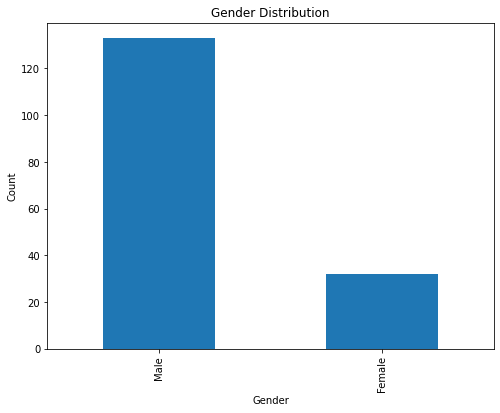

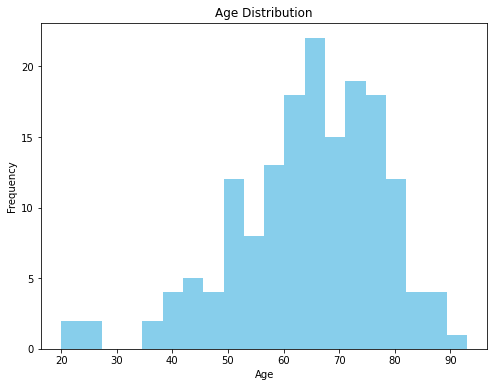

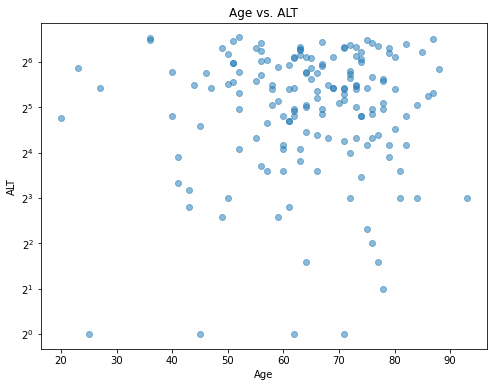

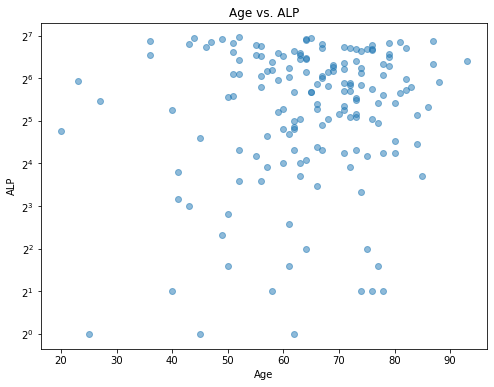

In [89]:
import matplotlib.pyplot as plt

# Bar plot of Gender distribution
plt.figure(figsize=(8, 6))
df['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Histogram of Age
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of Age vs. ALT (Alanine transaminase)
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['ALT'], alpha=0.5)
plt.title('Age vs. ALT')
plt.xlabel('Age')
plt.ylabel('ALT')
plt.yscale('log', base=2)
plt.show()

# Scatter plot of Age vs. ALP (Alanine Phosphatase)
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['ALP'], alpha=0.5)
plt.title('Age vs. ALP')
plt.xlabel('Age')
plt.ylabel('ALP')
plt.yscale('log', base=2)
plt.show()

With these graphs, we can conclude that male is the prominent sex in this dataset and that most of the patients are age 50 or above. 
About these enzimes (ALT and ALP), most of the patients seem to have high concentration across all ages.

Let's see alcohol and smoke consumption.

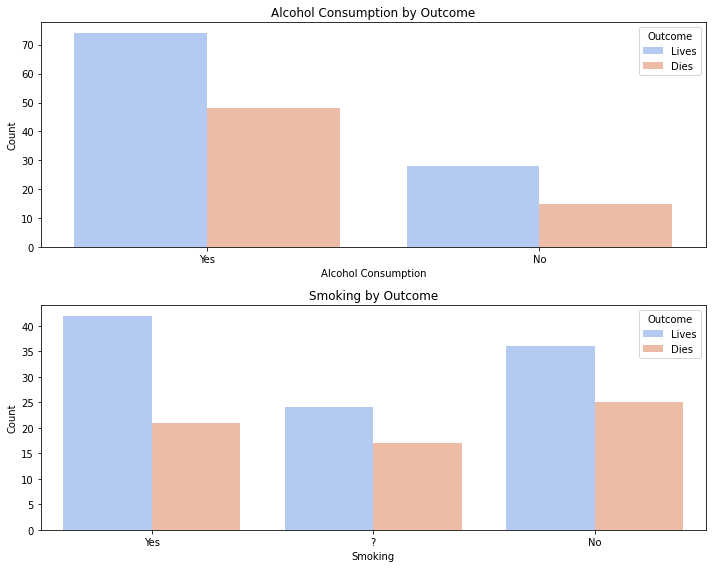

In [100]:
import seaborn as sns

# Create a grouped bar plot for alcohol consumption and smoking by outcome
plt.figure(figsize=(10, 8))

# Grouped bar plot for alcohol consumption by outcome
plt.subplot(2, 1, 1)
sns.countplot(data=df, x='Alcohol', hue='Class', palette='coolwarm')
plt.title('Alcohol Consumption by Outcome')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count')
plt.legend(title='Outcome')

# Grouped bar plot for smoking by outcome
plt.subplot(2, 1, 2)
sns.countplot(data=df, x='Smoking', hue='Class', palette='coolwarm')
plt.title('Smoking by Outcome')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.legend(title='Outcome')

plt.tight_layout()
plt.show()

The Alcohol Consumption graph displays an important information about our patients. The death rate of alcohol consumption seems to be slightly higher compared with those that don't consume, but we don't have a large amount of data to confirm that trend. However, that might be something to keep an eye on.

A curious fact is that there's a lower death rate in those who smoke rather than in those who don't smoke, but we have to keep in mind that there is a large amount of patients which we don't have data on, so this might be a parameter we might want to discard.

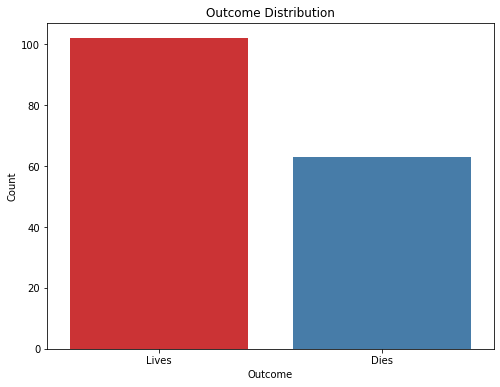

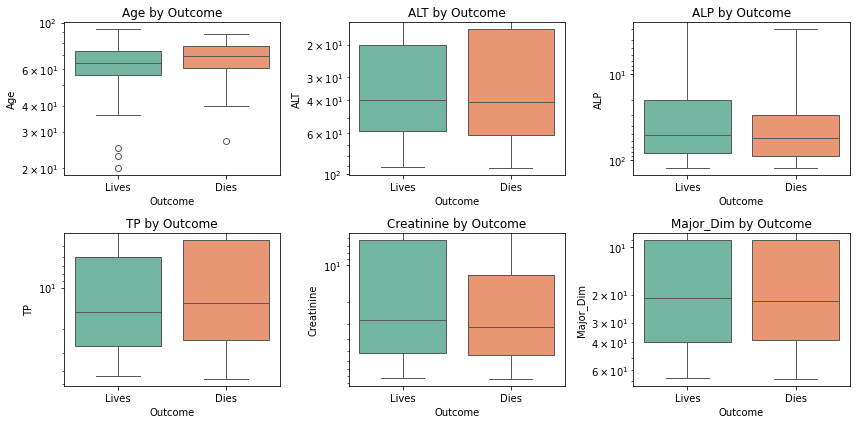

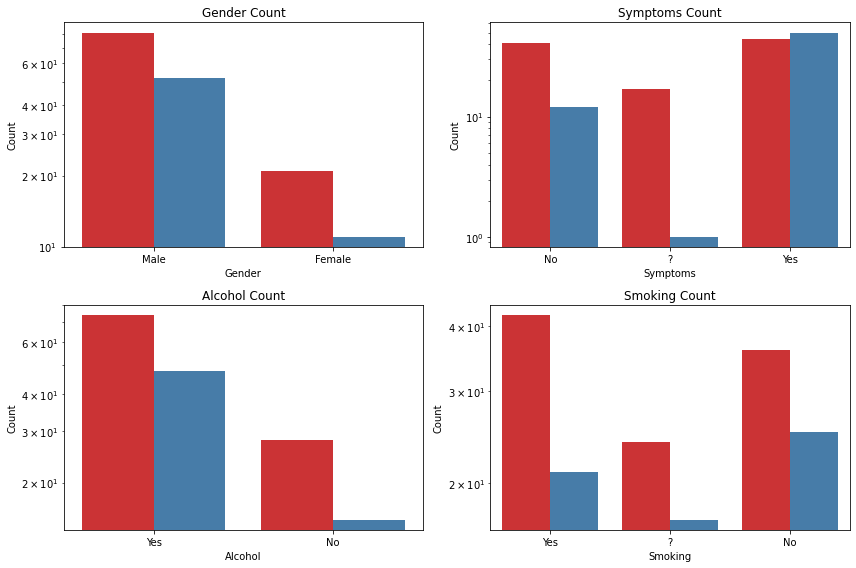

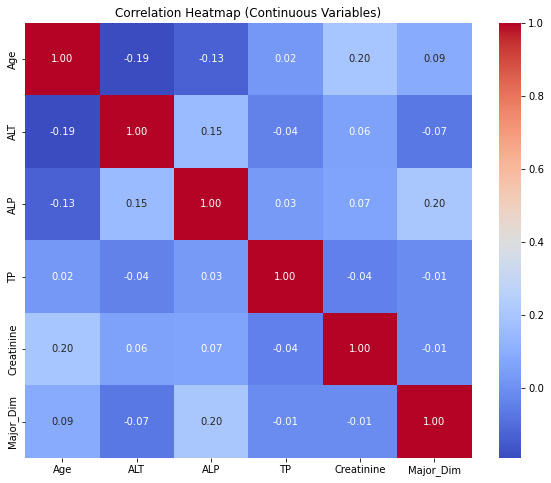

In [101]:
import numpy as np

# 1. Bar Plot of Outcome
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Class', hue='Class', palette='Set1', legend=False)
plt.title('Outcome Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

# 2. Histograms of Numeric Variables
numeric_vars = ['Age', 'ALT', 'ALP', 'TP', 'Creatinine', 'Major_Dim']

# 3. Box Plot of Numeric Variables by Outcome
plt.figure(figsize=(12, 6))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='Class', hue='Class', y=var, palette='Set2', legend=False)
    plt.title(f'{var} by Outcome')
    plt.xlabel('Outcome')
    plt.ylabel(var)
    plt.yscale('log')
plt.tight_layout()
plt.show()

# 4. Count Plot of Categorical Variables by Outcome
categorical_vars = ['Gender', 'Symptoms', 'Alcohol', 'Smoking']
plt.figure(figsize=(12, 8))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=var, hue='Class', palette='Set1', legend=False)
    plt.title(f'{var} Count')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.yscale('log')
plt.tight_layout()
plt.show()

# 5. Correlation Heatmap
continuous_vars = ['Age', 'ALT', 'ALP', 'TP', 'Creatinine', 'Major_Dim']

# Impute missing values with median
df_continuous = df[continuous_vars].replace('?', np.nan).astype(float)  # Convert '?' to NaN
df_continuous = df_continuous.fillna(df_continuous.median())  # Replace NaN with median

# Calculate correlation matrix for continuous variables
correlation_matrix = df_continuous.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Continuous Variables)')
plt.show()

<a id="data-preprocessing"></a>
## Data Preprocessing

As we talked about it before, some of the data included in the data set is not properly set up.
So, let's first map some of the data to a numerical form as stated bellow.

In [92]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_test = df.copy()

mapping = {"Yes": 1, "No": 0, "?": 2, "Male": 0, "Female": 1, "Lives": 1, "Dies": 0}

index = 0
for column in df_test.columns:
    if df_test[column].dtype == 'object' and (index < 23 or index == 49):
        df_test[column] = df_test[column].map(mapping)
    index+=1
df_test

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,0,0,1,0,0,0,0,1,0,1,...,150,7.1,0.7,1,3.5,0.5,?,?,?,1
1,1,2,0,0,0,0,1,1,2,2,...,?,?,?,1,1.8,?,?,?,?,1
2,0,0,1,1,0,1,0,1,0,1,...,109,7,2.1,5,13,0.1,28,6,16,1
3,0,1,1,0,0,0,0,1,0,1,...,174,8.1,1.11,2,15.7,0.2,?,?,?,0
4,0,1,1,1,0,1,0,1,0,1,...,109,6.9,1.8,1,9,?,59,15,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,1,0,1,2,2,2,1,1,0,1,...,109,7.6,0.7,5,3,?,?,?,?,1
161,1,1,0,2,2,2,2,1,0,0,...,280,6.7,0.7,1,2.2,2.3,?,?,?,0
162,0,0,1,0,0,0,0,1,0,1,...,181,7.5,1.46,5,18.6,?,?,?,?,1
163,0,0,1,1,0,1,1,1,1,1,...,170,8.4,0.74,5,18,?,?,?,?,0


Let us flag some parameters that we consider useless.

In [102]:
useless = {}
index = 0

# creating a list to see wich columns have the least yes's
for col in df_test.columns:
    if index >= 23: break
    yes_count = (df_test[col] == 1).sum()
    if yes_count <= 15: useless[col] = yes_count 
    index += 1

useless

{'HBeAg': 1, 'Endemic': 10, 'Hemochro': 7, 'HIV': 3, 'NASH': 8}

In [94]:
""" #removing unecessary rows 
for index in useless.keys():
    df_test=df_test.drop(index,axis=1)
df_test.head() """

' #removing unecessary rows \nfor index in useless.keys():\n    df_test=df_test.drop(index,axis=1)\ndf_test.head() '

In [95]:
for col in df_test.columns:
    df_test[col]=label_encoder.fit_transform(df_test[col])
print(df_test['PS'])

0      0
1      0
2      1
3      0
4      0
      ..
160    0
161    1
162    0
163    1
164    0
Name: PS, Length: 165, dtype: int64


In [96]:
# ?=median  of the column 
#col = 29-50 not inclusive
df_test.replace('?', pd.NA, inplace=True)
df_test = df_test.apply(pd.to_numeric, errors='coerce')
index=29
for col in df_test.columns[29:49]:
    median = df_test[col].median(skipna=True)
    df_test[col].fillna(median,inplace=True)
for col in df_test.columns[23:25]:
    median = df_test[col].median(skipna=True)
    df_test[col].fillna(median,inplace=True)

df_test

/tmp/ipykernel_17300/3082004727.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test[col].fillna(median,inplace=True)
/tmp/ipykernel_17300/3082004727.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,0,0,1,0,0,0,0,1,0,1,...,27,27,18,1,33,7,68,57,84,1
1,1,2,0,0,0,0,1,1,2,2,...,124,46,84,1,1,41,68,57,84,1
2,0,0,1,1,0,1,0,1,0,1,...,8,26,71,5,5,0,33,39,12,1
3,0,1,1,0,0,0,0,1,0,1,...,38,38,50,2,9,2,68,57,84,0
4,0,1,1,1,0,1,0,1,0,1,...,8,24,68,1,64,41,50,7,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,1,0,1,2,2,2,1,1,0,1,...,8,32,18,5,28,41,68,57,84,1
161,1,1,0,2,2,2,2,1,0,0,...,68,22,18,1,19,28,68,57,84,0
162,0,0,1,0,0,0,0,1,0,1,...,43,31,62,5,15,41,68,57,84,1
163,0,0,1,1,0,1,1,1,1,1,...,35,41,22,5,14,41,68,57,84,0


In [97]:
from sklearn.model_selection import train_test_split
train_df_np=df_test.to_numpy()
X, y =train_df_np[:,:-1], train_df_np[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

model = DecisionTreeClassifier()

# Training the decision tree model
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [99]:
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.5757575757575758
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.62      0.53        13
           1       0.69      0.55      0.61        20

    accuracy                           0.58        33
   macro avg       0.58      0.58      0.57        33
weighted avg       0.60      0.58      0.58        33

